# Fashion MNIST Classification using Neural Networks

In this notebook, we'll train a neural network to classify images of clothing items from the [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). The dataset consists of 70,000 grayscale images in 10 classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot. Each image is 28x28 pixels, and the classes are mutually exclusive.

We'll use the [Keras](https://keras.io/) deep learning framework to build and train our neural network. Keras provides a high-level API that makes it easy to define and train neural networks, even for beginners.

## Importing Libraries

Let's start by importing the necessary libraries for our project:

In [1]:
from tensorflow import *
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers


We'll use NumPy for numerical operations, Matplotlib for visualization, and Keras for building and training the neural network.

## Loading the Data
Next, we'll load the Fashion MNIST dataset and split it into training and testing sets:

In [2]:
# Loading the fashion MNIST dataset and splitting it into training and testing sets
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()


In [3]:
# Printing the number of samples in the training and testing sets
print("Number of samples in the training set:", len(train_images))
print("Number of labels in the training set:", len(train_labels))
print("Number of samples in the test set:", len(test_images))
print("Number of labels in the test set:", len(test_labels))


Number of samples in the training set: 60000
Number of labels in the training set: 60000
Number of samples in the test set: 10000
Number of labels in the test set: 10000


In [4]:
# Printing the shape of the testing images array
print("Shape of the testing images array:", test_images.shape)


Shape of the testing images array: (10000, 28, 28)


In [5]:
# Printing the shape of the train images array
print("Shape of the testing images array:", train_images.shape)


Shape of the testing images array: (60000, 28, 28)


We print the number of samples and labels in the training and testing sets to verify that the dataset was loaded correctly.

## Exploring the Data
Let's take a look at an example image from the testing set and its corresponding class label:

Class Label: 0


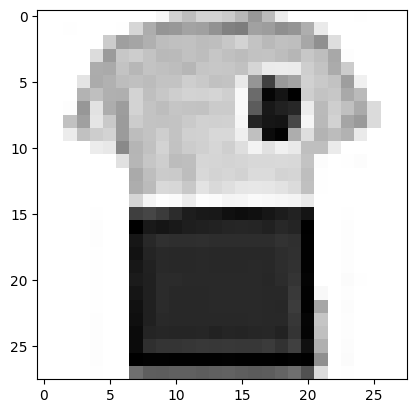

In [6]:
# Displaying an example image from the testing set and its class label
digit = test_images[120]
print("Class Label:", test_labels[120])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


This code displays the 120th image from the testing set (a sandal) and its class label.

In [7]:
# Printing the unique class labels in the training and testing sets
print("Unique class labels in the training set:", train_labels)
print("Unique class labels in the training set:", np.unique(train_labels))
print("Unique class labels in the test set:", test_labels)
print("Unique class labels in the test set:", np.unique(test_labels))


Unique class labels in the training set: array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)
Unique class labels in the training set: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
Unique class labels in the test set: array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)
Unique class labels in the test set: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)


## Defining the Neural Network
We'll use a simple neural network with two layers: a fully connected hidden layer with 512 units and ReLU activation, and a fully connected output layer with 10 units and softmax activation. We'll define the neural network using Keras' Sequential API:

In [8]:
# Defining the neural network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))


## Compiling the Model
Now that we've defined the neural network architecture, we need to compile the model. We'll use the rmsprop optimizer and categorical_crossentropy loss function, and track accuracy as a metric:

In [9]:
# Compiling the model by specifying the optimizer, loss function, and evaluation metrics
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [10]:
train_images.ndim


3

## Preprocessing the Data
Before training the neural network, we need to preprocess the data. First, we'll reshape the images arrays to have a single dimension of length 784 (28x28). Then, we'll normalize the pixel values to be between 0 and 1:

In [11]:
# Reshaping and normalizing the training and testing images arrays
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255  # Normalization

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255  # Normalization


In [12]:
train_labels[0]


9

We also cast the pixel values to float32 to avoid numerical issues during training.

Next, we'll convert the class labels to one-hot encoded vectors:

In [13]:
# Converting the class labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [14]:
train_labels[0]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

This allows us to use categorical crossentropy as the loss function for training the neural network.

## Training the Model
We're now ready to train the neural network. We'll use the fit() method to train the model on the training set for 5 epochs with a batch size of 128:

In [15]:
# Training the neural network on the training set
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.5579 - accuracy: 0.8027
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3844 - accuracy: 0.8588
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3397 - accuracy: 0.8761
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3128 - accuracy: 0.8833
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2939 - accuracy: 0.8904


## Evaluating the Model
Finally, we'll evaluate the performance of the model on the test set:

In [16]:
# Evaluating the performance of the trained model on the test set
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8432
Test accuracy: 0.8432000279426575


We print the test accuracy as the final metric.

This code loads the fashion MNIST dataset and trains a neural network to classify images of clothing items into 10 different classes. The neural network has two layers: a fully connected hidden layer with 512 units and ReLU activation, and a fully connected output layer with 10 units and softmax activation. The model is compiled with the RMSprop optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric. The training and testing images arrays are reshaped to have a single dimension of length 784 and are normalized to have pixel values between 0 and 1. The class labels are converted to one-hot encoded vectors before training the model. The model is trained for 5 epochs with a batch size of 128, and its performance is evaluated on the test set. Finally, the test accuracy is printed.

That's it! We've built a neural network that can classify images of clothing items with high accuracy. With some tweaking of the neural network architecture and training parameters, we can likely improve the performance even further.